In [1]:
import torch
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

In [2]:
from Model.FastSCNN import *
from Dataset.dataset import *

In [3]:
with open("params.yml") as file:
    params = load(file, Loader=Loader)
    
dataset_path = params["dataset_path"]   # Path at which the dataset is located
crop_height  = params["crop_height"]    # Height of cropped/resized input image
crop_width   = params["crop_width"]     # Width of cropped/resized input image
num_classes  = params["num_classes"]    # Number of classes

In [4]:
test_dataset = Dataset(dataset_path, crop_height, crop_width, mode="train")
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size  = 1,
    num_workers = 4,
    shuffle     = True
)
dataloader = iter(test_dataloader)

In [5]:
image, label = next(dataloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


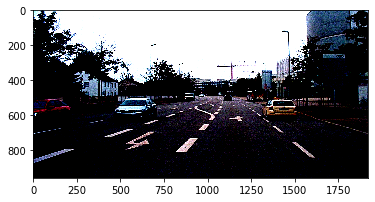

In [6]:
# normalized image
plt.imshow(np.moveaxis(image[0].detach().numpy(), 0, -1))
plt.show()

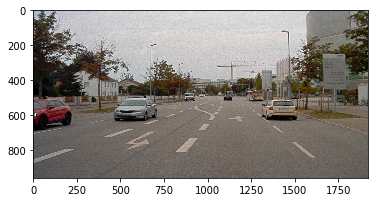

In [7]:
# denormalized image
plt.imshow(np.moveaxis(np.array(test_dataset.denormalize(image[0])), 0, -1))
plt.show()

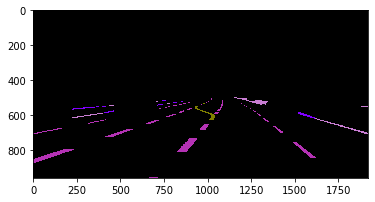

In [8]:
plt.imshow(colourize(label[0].detach().numpy(), test_dataset.class_dict))
plt.show()

In [9]:
model = FastSCNN(image_height   = crop_height,
                 image_width    = crop_width,
                 image_channels = 3,
                 num_classes    = num_classes)

In [10]:
model.load_state_dict(torch.load("./checkpoints/latest_model.pt"))

<All keys matched successfully>

In [11]:
with torch.no_grad():
    model.eval()
    
    output = model(image)

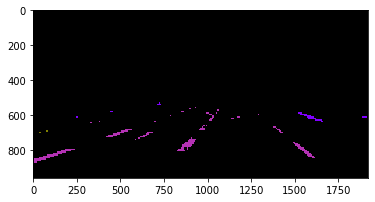

In [12]:
plt.imshow(colourize(reverse_one_hot(output[0]), test_dataset.class_dict))
plt.show()

## Timing Results

In [13]:
img = torch.randn(1, 3, 960, 1920)

In [14]:
%%timeit

with torch.no_grad():
    model.eval()
    
    label = model(img)

362 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
